# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']  
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country'] 
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | colonia
Processing Record 3 of Set 1 | cable beach
City not found. Skipping...
Processing Record 4 of Set 1 | peace river
Processing Record 5 of Set 1 | ararangua
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | al burayqah
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | howard springs
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | littlefield
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | lerwick
Processing Record 22 of Set 1 | ene

Processing Record 38 of Set 4 | la sarre
Processing Record 39 of Set 4 | balangir
Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | praia da vitoria
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | adiyaman
Processing Record 44 of Set 4 | howrah
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | coroata
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | baicheng
Processing Record 49 of Set 4 | minas de marcona
Processing Record 0 of Set 5 | goure
Processing Record 1 of Set 5 | kailua-kona
Processing Record 2 of Set 5 | zhezqazghan
Processing Record 3 of Set 5 | tamanrasset
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | uyovu
Processing Record 7 of Set 5 | veraval
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of Set 5 | stanley
Processing Record 10 of Set 5 | moranbah
Processing Record 11 of Set 5 | san antoni

Processing Record 31 of Set 8 | vernon
Processing Record 32 of Set 8 | canutama
Processing Record 33 of Set 8 | hammerfest
Processing Record 34 of Set 8 | muang phonsavan
Processing Record 35 of Set 8 | la junta
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | alofi
Processing Record 38 of Set 8 | quang ngai
Processing Record 39 of Set 8 | holualoa
Processing Record 40 of Set 8 | puerto leguizamo
Processing Record 41 of Set 8 | narvik
Processing Record 42 of Set 8 | cooper's town
Processing Record 43 of Set 8 | bafoulabe
Processing Record 44 of Set 8 | blackwater
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | skovorodino
Processing Record 47 of Set 8 | del rio
Processing Record 48 of Set 8 | namtsy
Processing Record 49 of Set 8 | taroa
Processing Record 0 of Set 9 | state college
Processing Record 1 of Set 9 | grand baie
Processing Record 2 of Set 9 | tomatlan
Processing Record 3 of Set 9 | 'ali sabieh
Processing Record 4 of Set 9 | king

Processing Record 22 of Set 12 | dom pedro
Processing Record 23 of Set 12 | chela
Processing Record 24 of Set 12 | hudson
Processing Record 25 of Set 12 | melfort
Processing Record 26 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 27 of Set 12 | orumiyeh
Processing Record 28 of Set 12 | suva
Processing Record 29 of Set 12 | saint-georges
Processing Record 30 of Set 12 | potsdam
Processing Record 31 of Set 12 | aktau
Processing Record 32 of Set 12 | kuacjok
Processing Record 33 of Set 12 | san rafael del sur
Processing Record 34 of Set 12 | portland
Processing Record 35 of Set 12 | loen
Processing Record 36 of Set 12 | mejit
Processing Record 37 of Set 12 | mariehamn
Processing Record 38 of Set 12 | sinop
Processing Record 39 of Set 12 | roma
Processing Record 40 of Set 12 | san mariano
Processing Record 41 of Set 12 | bonthe
Processing Record 42 of Set 12 | kalulushi
Processing Record 43 of Set 12 | sandnessjoen
Processing Record 44 of Set 12 | kimbe
Processing Reco

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,15.34,92,0,2.84,ZA,1697595749
1,colonia,50.9333,6.9500,7.75,79,0,1.54,DE,1697595792
2,peace river,56.2501,-117.2860,5.17,93,20,2.57,CA,1697596174
3,ararangua,-28.9347,-49.4858,16.51,82,100,3.57,BR,1697596174
4,port-aux-francais,-49.3500,70.2167,2.44,74,99,6.17,TF,1697595747


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,15.34,92,0,2.84,ZA,1697595749
1,colonia,50.9333,6.9500,7.75,79,0,1.54,DE,1697595792
2,peace river,56.2501,-117.2860,5.17,93,20,2.57,CA,1697596174
3,ararangua,-28.9347,-49.4858,16.51,82,100,3.57,BR,1697596174
4,port-aux-francais,-49.3500,70.2167,2.44,74,99,6.17,TF,1697595747


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

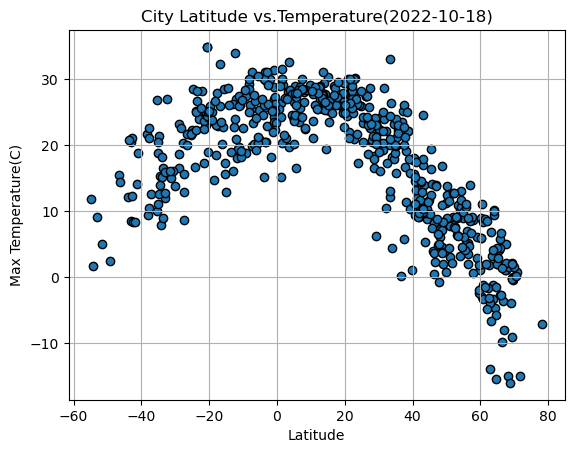

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

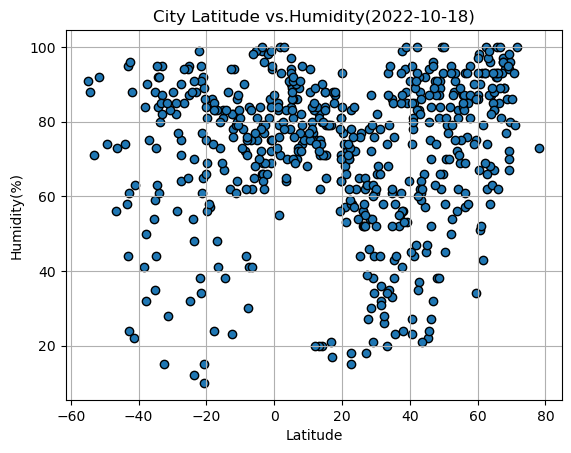

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

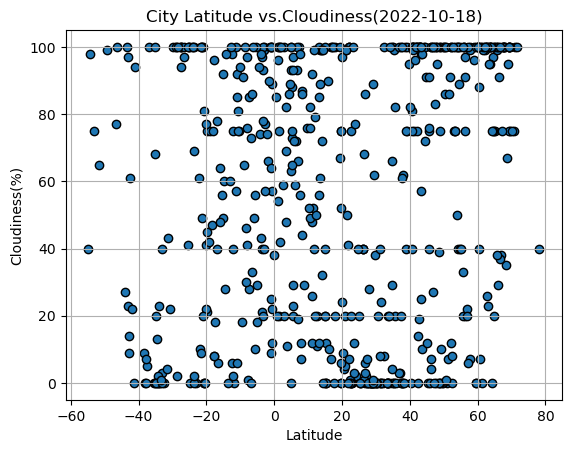

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

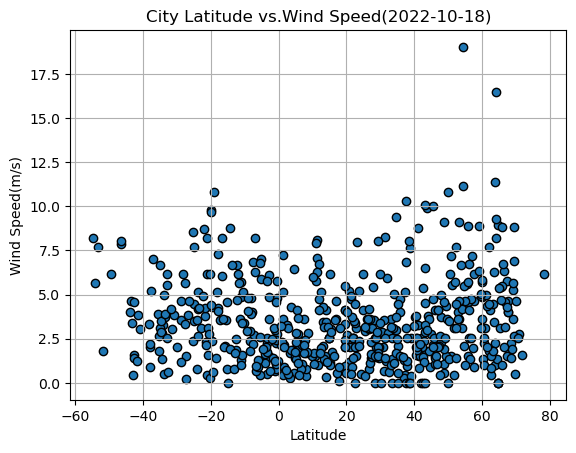

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,colonia,50.9333,6.9500,7.75,79,0,1.54,DE,1697595792
2,peace river,56.2501,-117.2860,5.17,93,20,2.57,CA,1697596174
6,al burayqah,30.4062,19.5739,22.15,66,0,2.87,LY,1697596174
9,iqaluit,63.7506,-68.5145,-1.15,58,100,1.03,CA,1697595751
10,bethel,41.3712,-73.4140,12.02,85,75,1.54,US,1697595745


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,15.34,92,0,2.84,ZA,1697595749
3,ararangua,-28.9347,-49.4858,16.51,82,100,3.57,BR,1697596174
4,port-aux-francais,-49.3500,70.2167,2.44,74,99,6.17,TF,1697595747
5,waitangi,-43.9535,-176.5597,12.12,74,27,4.02,NZ,1697595743
7,west island,-12.1568,96.8225,26.99,78,40,6.69,CC,1697595761


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.88


Text(0, 0.5, 'Temperature(C)')

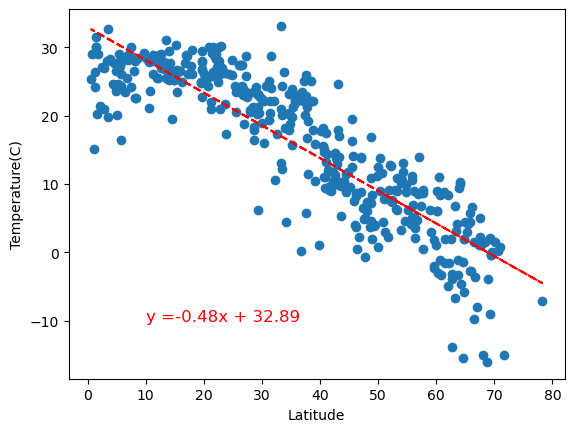

In [39]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.66


Text(0, 0.5, 'Temperature(C)')

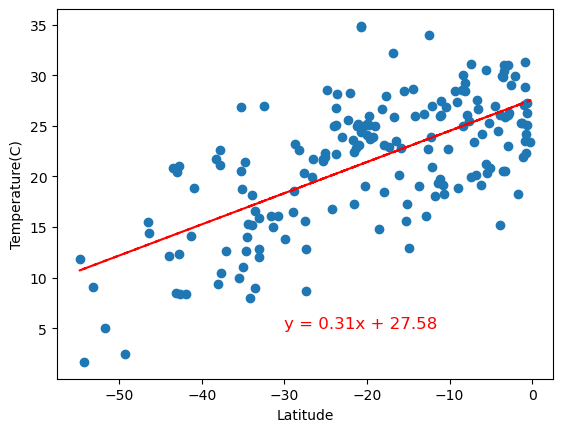

In [40]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** Latitude and temperature in a city have a substantial negative correlation in the northern hemisphere (-0.81). In other words, a city would have a lower temperature the higher its latitude. On the other hand, a city's latitude and temperature have a moderately positive association (0.73) in the southern hemisphere. In other words, a city would have a higher temperature the higher its latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.13


Text(0, 0.5, 'Humidity(%)')

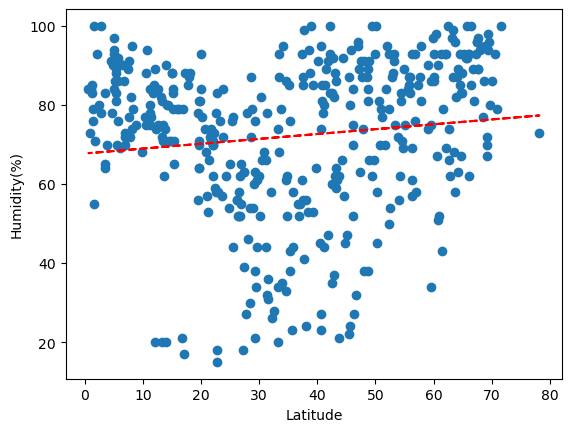

In [41]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.13


Text(0, 0.5, 'Humidity(%)')

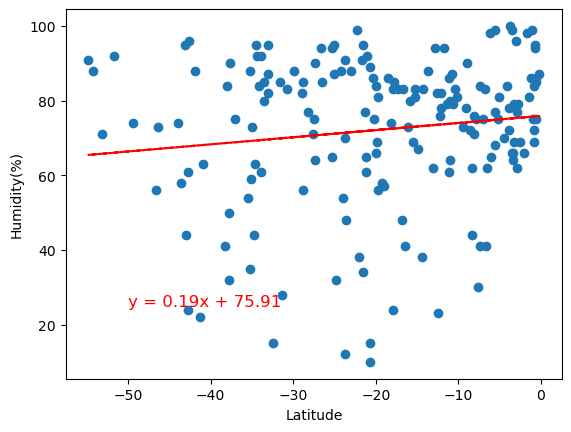

In [42]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** A city's latitude and humidity have a somewhat positive association (0.16) in the northern hemisphere. In other words, a city's humidity is expected to grow with increasing latitude, although only slightly; in the southern hemisphere, a city's latitude and humidity similarly have a weakly positive association (0.08). In other words, as the latitude rises, the humidity in the city is likely to rise, even though slowly.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.21


Text(0, 0.5, 'Cloudiness(%)')

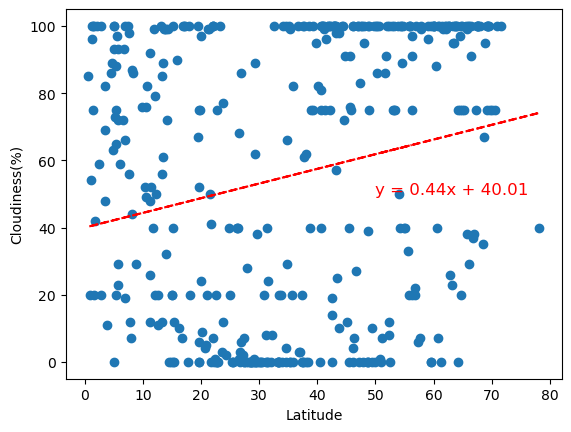

In [43]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.17


Text(0, 0.5, 'Cloudiness(%)')

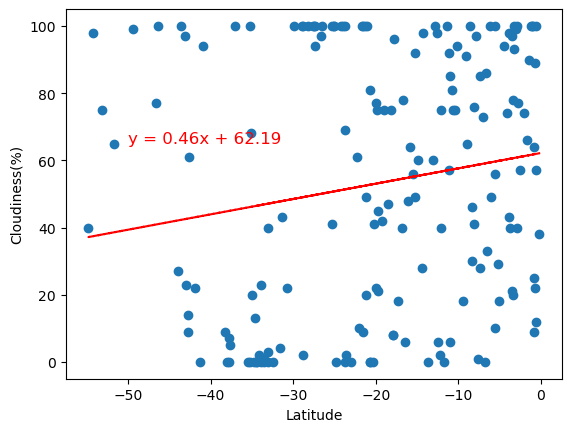

In [44]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** A city's latitude and cloudiness level nearly never correlate (0.02 in the northern hemisphere). In other words, the amount of cloud cover in a city is not significantly correlated with its latitude. In the southern hemisphere, the correlation is similarly low (0.17).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.25


Text(0, 0.5, 'Wind Speed(m/s)')

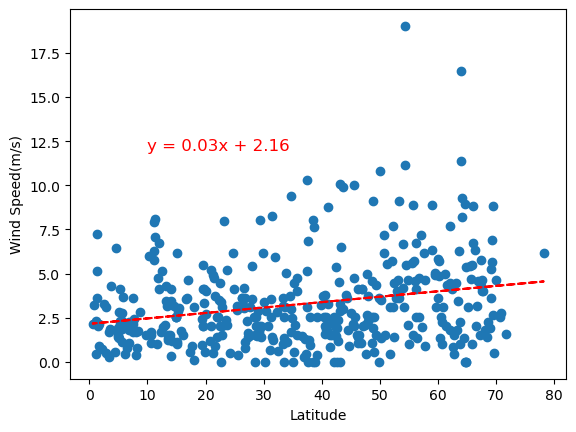

In [45]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.17


Text(0, 0.5, 'Wind Speed(m/s)')

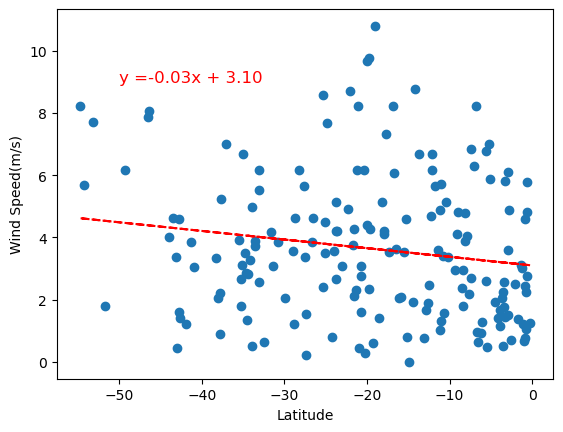

In [47]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** The latitude of a city and the wind speed have no relationship in the northern hemisphere (0.00). In other words, the amount of wind in a city is not significantly correlated with its latitude. In the southern hemisphere, the situation is similar, with a very slight negative correlation (-0.17) between the city's latitude and wind speed.